## Binary Classification on Titanic dataset with Python

We will be using [Titanic Data Set](https://www.kaggle.com/c/titanic) hosted on Kaggle to predict if passengers on board Titanic 'survived' or 'deceased'.

In [1]:
# import data processing libraries
import pandas as pd
import numpy as np

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the data into Pandas Dataframe
df = pd.read_csv('titanic_dataset/titanic_train.csv')

In [4]:
# check out the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# drop unnecessary columns
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'])

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [7]:
# get summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


In [8]:
# check for null values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

### We fill the null value in 'Age' column with mean of 'Age' column value

In [9]:
df.Age = df.Age.fillna(value=df.Age.mean())

In [10]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

### Exploratory Data Analysis (EDA)

In [11]:
# import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

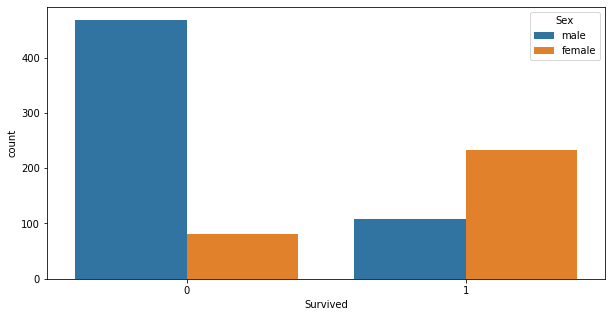

In [12]:
# visualize number of passegers 'Survived' with respect to passenger's Sex'
plt.figure(figsize=(10,5))
sns.countplot(df.Survived, hue=df.Sex)

> Number of Females survived is greater as compared Males

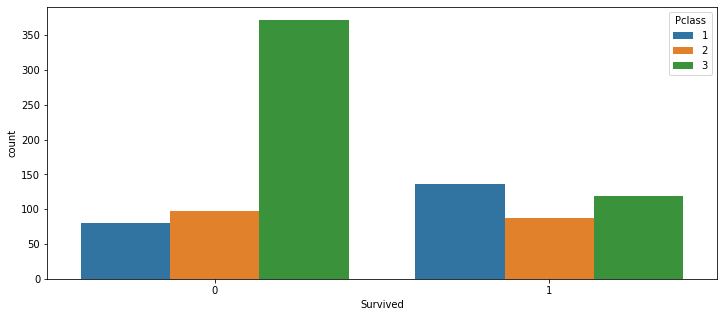

In [13]:
# visualize number of passegers 'Survived' with respect to 'Pclass' i.e Ticket class
plt.figure(figsize=(12,5))
sns.countplot(df.Survived, hue=df.Pclass)

> Number of Passengers with Ticket class (pclass) as 3rd i.e. lower failed to survive

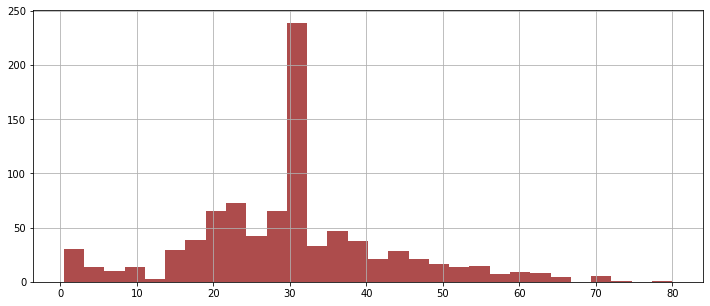

In [14]:
# visualize distribution of passenger's 'Age'
df['Age'].hist(bins=30,color='darkred',alpha=0.7, figsize=(12,5))

> The highest number of passengers aged between 31 and 32 is the mean of the 'Age' column which we filled for null values

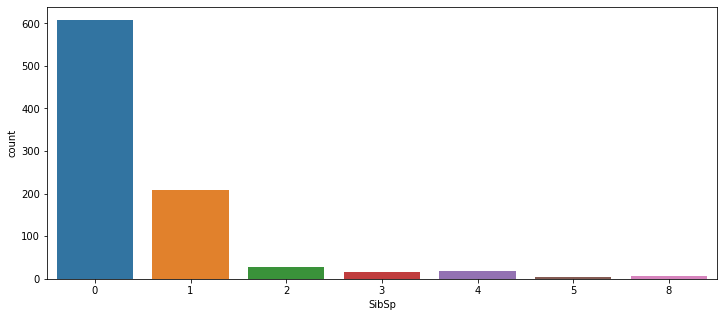

In [15]:
# visualize number of siblings/spouses on board the Titanic
plt.figure(figsize=(12,5))
sns.countplot(df.SibSp)

> Maximum number of passengers do not have any siblings/spouses on board.

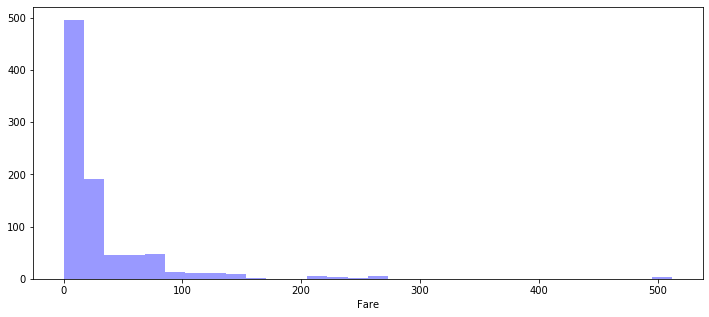

In [16]:
# visualize distribution of passenger's 'Fare'
plt.figure(figsize=(12,5))
sns.distplot(df.Fare,kde=False,color='blue',bins=30)

> Maximum number of passengers have their fare below 27 pounds

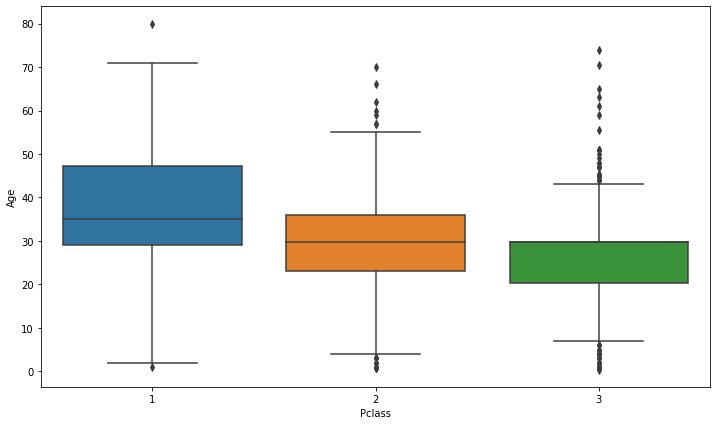

In [17]:
# visualize distribution of passenger's Ticket class 'pclass' with respect to their 'Age'
plt.figure(figsize=(12,7))
sns.boxplot(x=df.Pclass, y=df.Age, linewidth=1.5)

> We see wealthier passengers in higher classes tend to be older, which makes sense.

### Change the datatype of 'Sex' column from object to integer so that our machine learning algorithm is able to interpret it.

In [18]:
df['Sex'] = df['Sex'].map({'male':0,'female':1})

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(5)
memory usage: 48.8 KB


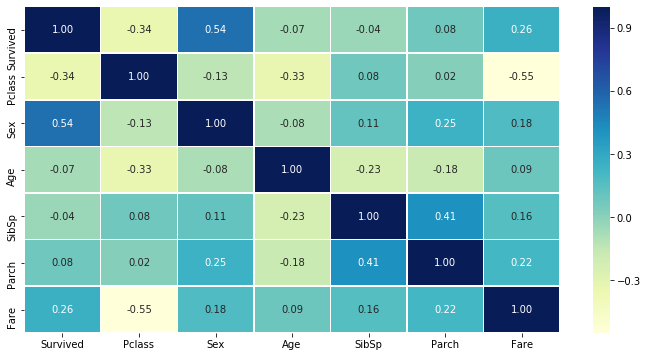

In [20]:
# visualize the pearson correlation between different column values
plt.figure(figsize=(12,6))
sns.heatmap(data=df.corr(), annot=True, fmt='.2f', linewidths=.5, cmap="YlGnBu")

> Seems 'Sex' and 'Fare' are important factors for surviving on the Titanic.

## Build and evaluate Machine Learning Classification Model
1. Split the data for training and testing

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Survived'), df['Survived'], test_size=0.3)

### We will be going through all the classifiers to get the best one with highest accuracy on our prediction

In [23]:
# import data modeling and metric libraries
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier 
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

2. Create a classifier object instance  
3. Fit the classfier on training data
4. Make predictions on test data
5. Evaluate our predictions on metrics like confusion_matrix, classification_report and accuracy_report

In [24]:
classifiers = [LogisticRegressionCV(cv=5), RidgeClassifierCV(cv=5), SGDClassifier(), DecisionTreeClassifier(), 
               ExtraTreeClassifier(), RandomForestClassifier(n_estimators=100), GradientBoostingClassifier(), 
               ExtraTreesClassifier(n_estimators=100), AdaBoostClassifier(),BaggingClassifier(), XGBClassifier(), GaussianNB(), 
               LinearSVC(), SVC(gamma='scale'), KNeighborsClassifier(), LGBMClassifier(), CatBoostClassifier()]

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    print('='*70)
    print(name)
    print('****Results****')
    print('\n')
    preds = clf.predict(X_test)
    print('Confusion_Matrix :')
    print(confusion_matrix(y_test, preds))
    print('\n')
    print('Classification_Report :')
    print(classification_report(y_test, preds))
    print('\n')
    print(f'Accuracy_Score : {(accuracy_score(y_test, preds)*100):.2f}%')
    print('\n')

LogisticRegressionCV
****Results****


Confusion_Matrix :
[[143  13]
 [ 40  72]]


Classification_Report :
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       156
           1       0.85      0.64      0.73       112

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.80      0.80       268



Accuracy_Score : 80.22%


RidgeClassifierCV
****Results****


Confusion_Matrix :
[[141  15]
 [ 39  73]]


Classification_Report :
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       156
           1       0.83      0.65      0.73       112

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.78       268
weighted avg       0.80      0.80      0.79       268



Accuracy_Score : 79.85%


SGDClassifier
****Results****


Confusion_Matrix :
[[ 20 136]
 [  8 104]]


Cla

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier
****Results****


Confusion_Matrix :
[[139  17]
 [ 32  80]]


Classification_Report :
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       156
           1       0.82      0.71      0.77       112

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268



Accuracy_Score : 81.72%


GradientBoostingClassifier
****Results****


Confusion_Matrix :
[[150   6]
 [ 34  78]]


Classification_Report :
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       156
           1       0.93      0.70      0.80       112

    accuracy                           0.85       268
   macro avg       0.87      0.83      0.84       268
weighted avg       0.86      0.85      0.85       268



Accuracy_Score : 85.07%


ExtraTreesClassifier
****Results****


Confusion_Matrix :
[[130  26]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LGBMClassifier
****Results****


Confusion_Matrix :
[[144  12]
 [ 33  79]]


Classification_Report :
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       156
           1       0.87      0.71      0.78       112

    accuracy                           0.83       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.83      0.83       268



Accuracy_Score : 83.21%


Learning rate set to 0.014654
0:	learn: 0.6840288	total: 121ms	remaining: 2m
1:	learn: 0.6784004	total: 147ms	remaining: 1m 13s
2:	learn: 0.6698995	total: 192ms	remaining: 1m 3s
3:	learn: 0.6616334	total: 230ms	remaining: 57.2s
4:	learn: 0.6532587	total: 257ms	remaining: 51.2s
5:	learn: 0.6462384	total: 292ms	remaining: 48.4s
6:	learn: 0.6372533	total: 330ms	remaining: 46.8s
7:	learn: 0.6303076	total: 365ms	remaining: 45.2s
8:	learn: 0.6259794	total: 381ms	remaining: 42s
9:	learn: 0.6184838	total: 418ms	remaining: 41.4s
10:	learn: 0.61198

154:	learn: 0.3952238	total: 4.9s	remaining: 26.7s
155:	learn: 0.3950872	total: 4.93s	remaining: 26.7s
156:	learn: 0.3944848	total: 4.96s	remaining: 26.7s
157:	learn: 0.3941690	total: 5.01s	remaining: 26.7s
158:	learn: 0.3938044	total: 5.04s	remaining: 26.7s
159:	learn: 0.3934851	total: 5.08s	remaining: 26.7s
160:	learn: 0.3931827	total: 5.12s	remaining: 26.7s
161:	learn: 0.3928188	total: 5.15s	remaining: 26.7s
162:	learn: 0.3925396	total: 5.19s	remaining: 26.6s
163:	learn: 0.3922263	total: 5.22s	remaining: 26.6s
164:	learn: 0.3917337	total: 5.26s	remaining: 26.6s
165:	learn: 0.3909318	total: 5.29s	remaining: 26.6s
166:	learn: 0.3905645	total: 5.33s	remaining: 26.6s
167:	learn: 0.3904950	total: 5.36s	remaining: 26.5s
168:	learn: 0.3899738	total: 5.39s	remaining: 26.5s
169:	learn: 0.3897258	total: 5.42s	remaining: 26.5s
170:	learn: 0.3893233	total: 5.46s	remaining: 26.4s
171:	learn: 0.3889218	total: 5.49s	remaining: 26.4s
172:	learn: 0.3889051	total: 5.51s	remaining: 26.3s
173:	learn: 0

317:	learn: 0.3647266	total: 10.1s	remaining: 21.7s
318:	learn: 0.3645663	total: 10.2s	remaining: 21.7s
319:	learn: 0.3642446	total: 10.2s	remaining: 21.7s
320:	learn: 0.3642304	total: 10.2s	remaining: 21.6s
321:	learn: 0.3641138	total: 10.3s	remaining: 21.6s
322:	learn: 0.3639970	total: 10.3s	remaining: 21.6s
323:	learn: 0.3638633	total: 10.3s	remaining: 21.5s
324:	learn: 0.3638066	total: 10.4s	remaining: 21.5s
325:	learn: 0.3636953	total: 10.4s	remaining: 21.5s
326:	learn: 0.3636824	total: 10.4s	remaining: 21.4s
327:	learn: 0.3636384	total: 10.4s	remaining: 21.4s
328:	learn: 0.3635480	total: 10.5s	remaining: 21.4s
329:	learn: 0.3635394	total: 10.5s	remaining: 21.3s
330:	learn: 0.3633357	total: 10.5s	remaining: 21.3s
331:	learn: 0.3631577	total: 10.6s	remaining: 21.3s
332:	learn: 0.3631274	total: 10.6s	remaining: 21.2s
333:	learn: 0.3629713	total: 10.6s	remaining: 21.2s
334:	learn: 0.3629090	total: 10.6s	remaining: 21.1s
335:	learn: 0.3629082	total: 10.7s	remaining: 21.1s
336:	learn: 

478:	learn: 0.3472659	total: 15.3s	remaining: 16.7s
479:	learn: 0.3472003	total: 15.4s	remaining: 16.7s
480:	learn: 0.3470410	total: 15.4s	remaining: 16.6s
481:	learn: 0.3469324	total: 15.4s	remaining: 16.6s
482:	learn: 0.3467469	total: 15.5s	remaining: 16.6s
483:	learn: 0.3467251	total: 15.5s	remaining: 16.5s
484:	learn: 0.3465500	total: 15.5s	remaining: 16.5s
485:	learn: 0.3463907	total: 15.6s	remaining: 16.5s
486:	learn: 0.3463186	total: 15.6s	remaining: 16.4s
487:	learn: 0.3461930	total: 15.7s	remaining: 16.4s
488:	learn: 0.3460648	total: 15.7s	remaining: 16.4s
489:	learn: 0.3460304	total: 15.7s	remaining: 16.4s
490:	learn: 0.3459915	total: 15.7s	remaining: 16.3s
491:	learn: 0.3459364	total: 15.8s	remaining: 16.3s
492:	learn: 0.3458157	total: 15.8s	remaining: 16.3s
493:	learn: 0.3457084	total: 15.8s	remaining: 16.2s
494:	learn: 0.3456798	total: 15.9s	remaining: 16.2s
495:	learn: 0.3454808	total: 15.9s	remaining: 16.2s
496:	learn: 0.3454003	total: 15.9s	remaining: 16.1s
497:	learn: 

639:	learn: 0.3300670	total: 20.6s	remaining: 11.6s
640:	learn: 0.3300135	total: 20.6s	remaining: 11.6s
641:	learn: 0.3299781	total: 20.7s	remaining: 11.5s
642:	learn: 0.3297765	total: 20.7s	remaining: 11.5s
643:	learn: 0.3297458	total: 20.7s	remaining: 11.5s
644:	learn: 0.3294918	total: 20.8s	remaining: 11.4s
645:	learn: 0.3294469	total: 20.8s	remaining: 11.4s
646:	learn: 0.3292043	total: 20.8s	remaining: 11.4s
647:	learn: 0.3291355	total: 20.9s	remaining: 11.3s
648:	learn: 0.3289680	total: 20.9s	remaining: 11.3s
649:	learn: 0.3287925	total: 20.9s	remaining: 11.3s
650:	learn: 0.3287197	total: 21s	remaining: 11.2s
651:	learn: 0.3287097	total: 21s	remaining: 11.2s
652:	learn: 0.3286443	total: 21s	remaining: 11.2s
653:	learn: 0.3284542	total: 21.1s	remaining: 11.2s
654:	learn: 0.3283102	total: 21.1s	remaining: 11.1s
655:	learn: 0.3282290	total: 21.2s	remaining: 11.1s
656:	learn: 0.3281555	total: 21.2s	remaining: 11.1s
657:	learn: 0.3281326	total: 21.2s	remaining: 11s
658:	learn: 0.328131

801:	learn: 0.3142632	total: 26.1s	remaining: 6.45s
802:	learn: 0.3142628	total: 26.1s	remaining: 6.41s
803:	learn: 0.3142332	total: 26.2s	remaining: 6.38s
804:	learn: 0.3141999	total: 26.2s	remaining: 6.35s
805:	learn: 0.3139663	total: 26.3s	remaining: 6.32s
806:	learn: 0.3138500	total: 26.3s	remaining: 6.29s
807:	learn: 0.3137531	total: 26.3s	remaining: 6.25s
808:	learn: 0.3137301	total: 26.4s	remaining: 6.22s
809:	learn: 0.3136716	total: 26.4s	remaining: 6.19s
810:	learn: 0.3136328	total: 26.4s	remaining: 6.16s
811:	learn: 0.3136045	total: 26.5s	remaining: 6.13s
812:	learn: 0.3135850	total: 26.5s	remaining: 6.1s
813:	learn: 0.3133041	total: 26.5s	remaining: 6.06s
814:	learn: 0.3131901	total: 26.6s	remaining: 6.03s
815:	learn: 0.3131898	total: 26.6s	remaining: 6s
816:	learn: 0.3131668	total: 26.6s	remaining: 5.96s
817:	learn: 0.3130688	total: 26.7s	remaining: 5.93s
818:	learn: 0.3130503	total: 26.7s	remaining: 5.9s
819:	learn: 0.3130378	total: 26.7s	remaining: 5.86s
820:	learn: 0.313

960:	learn: 0.3052549	total: 31.1s	remaining: 1.26s
961:	learn: 0.3052547	total: 31.1s	remaining: 1.23s
962:	learn: 0.3052074	total: 31.2s	remaining: 1.2s
963:	learn: 0.3050784	total: 31.2s	remaining: 1.17s
964:	learn: 0.3050628	total: 31.2s	remaining: 1.13s
965:	learn: 0.3050627	total: 31.3s	remaining: 1.1s
966:	learn: 0.3050270	total: 31.3s	remaining: 1.07s
967:	learn: 0.3050101	total: 31.3s	remaining: 1.03s
968:	learn: 0.3049304	total: 31.4s	remaining: 1s
969:	learn: 0.3047101	total: 31.4s	remaining: 971ms
970:	learn: 0.3047096	total: 31.4s	remaining: 938ms
971:	learn: 0.3046771	total: 31.4s	remaining: 906ms
972:	learn: 0.3046754	total: 31.5s	remaining: 873ms
973:	learn: 0.3046344	total: 31.5s	remaining: 841ms
974:	learn: 0.3046331	total: 31.5s	remaining: 808ms
975:	learn: 0.3046327	total: 31.5s	remaining: 776ms
976:	learn: 0.3046308	total: 31.6s	remaining: 743ms
977:	learn: 0.3046216	total: 31.6s	remaining: 711ms
978:	learn: 0.3046121	total: 31.6s	remaining: 678ms
979:	learn: 0.304

### Gradient Boosting Classifier gave one of the best accuracy of 85.07%
____

## Let try binary classification on Titanic dataset using Deep Learning API i.e Keras 

In [25]:
# import keras libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import adam

Using TensorFlow backend.


In [26]:
# create a Sequential Model
classifier = Sequential()

# 32 Dense neurons with 6 input dimension (i.e 6 columns in the data), uniform kernel initializer & 
# Rectified Linear Unit as the activation function
classifier.add(Dense(units=32, input_dim=6, kernel_initializer='uniform', activation='relu'))

# Dropout layer to avoid overfitting on training data
classifier.add(Dropout(0.3))

# 64 Dense neurons, uniform kernel initializer & Rectified Linear Unit as the activation function
classifier.add(Dense(units=64, kernel_initializer='uniform', activation='relu'))

# Dropout layer to avoid overfitting on training data
classifier.add(Dropout(0.3))

# output layer with 'sigmoid' as the activation function
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# compile the model using binary crossentropy & Adam optimizer
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model on the training data using batch size of 16, 100 epochs and validation data as test data
classifier.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Train on 623 samples, validate on 268 samples
Epoch 1/100
623/623 [==============================] - 1s 1ms/step - loss: 0.6818 - acc: 0.5907 - val_loss: 0.6625 - val_acc: 0.5821
Epoch 2/100
623/623 [==============================] - 0s 95us/step - loss: 0.6292 - acc: 0.6758 - val_loss: 0.6106 - val_acc: 0.6978
Epoch 3/100
623/623 [==============================] - 0s 96us/step - loss: 0.6064 - acc: 0.6854 - val_loss: 0.6013 - val_acc: 0.7201
Epoch 4/100
623/623 [==============================] - 0s 91us/step - loss: 0.5965 - acc: 0.6918 - val_loss: 0.5952 - val_acc: 0.6679
Epoch 5/100
623/623 [==============================] - 0s 98us/step - loss: 0.5991 - acc: 0.6966 - val_loss: 0.5865 - val_acc: 0.6828
Epoch 6/100
623/623 [==============================] - 0s 104us/step - loss: 0.5829 - acc: 0.6998 - val_loss: 0.5840 - val_acc: 0.6791
Epoch 7/100
623/623 [==============================] - 0s 100us/step - loss: 0.5878 - acc: 0.7223 - val_loss: 0.5771 - val_acc: 0.6791
Epoch 8/100
623

623/623 [==============================] - 0s 113us/step - loss: 0.4368 - acc: 0.8010 - val_loss: 0.4385 - val_acc: 0.7873
Epoch 62/100
623/623 [==============================] - 0s 100us/step - loss: 0.4475 - acc: 0.7929 - val_loss: 0.4390 - val_acc: 0.7724
Epoch 63/100
623/623 [==============================] - 0s 103us/step - loss: 0.4355 - acc: 0.8058 - val_loss: 0.4360 - val_acc: 0.7948
Epoch 64/100
623/623 [==============================] - 0s 107us/step - loss: 0.4489 - acc: 0.8058 - val_loss: 0.4435 - val_acc: 0.7873
Epoch 65/100
623/623 [==============================] - 0s 108us/step - loss: 0.4512 - acc: 0.8042 - val_loss: 0.4516 - val_acc: 0.7873
Epoch 66/100
623/623 [==============================] - 0s 104us/step - loss: 0.4520 - acc: 0.7945 - val_loss: 0.4499 - val_acc: 0.7836
Epoch 67/100
623/623 [==============================] - 0s 100us/step - loss: 0.4491 - acc: 0.8026 - val_loss: 0.4630 - val_acc: 0.7687
Epoch 68/100
623/623 [==============================] - 0s 10

### We get an accuracy of close to 79% on test data by using a basic deep learning model which can be improved by pre-processing data and tuning the parameters of the deep learing model
____

## Machine Learning Interpretability using Eli5 and SHAP

Many people say machine learning models are "black boxes", in the sense that they can make good predictions but you can't understand the logic behind those predictions.
- What features in the data did the model think are most important?
- For any single prediction from a model, how did each feature in the data affect that particular prediction?
- How does each feature affect the model's predictions in a big-picture sense (what is its typical effect when considered over a large number of possible predictions)?

Why are these Model Insights valuable?
- Debugging
- Informing feature engineering
- Directing future data collection
- Informing human decision-making
- Building Trust

Lets now understand the logic behind machine learning model prediction using tools like Eli5 and SHAP

### [ELI5](https://eli5.readthedocs.io/en/latest/)
- ELI5 is a Python library which allows to visualize and debug various Machine Learning models using unified API. It has built-in support for several ML frameworks and provides a way to explain black-box models.
- ELI5 provides a way to compute feature importances for any black-box estimator by measuring how score decreases when a feature is not available; the method is also known as “__permutation importance__” or “Mean Decrease Accuracy (MDA)”.
- __Permutation Importance__ works as follows
    1. Get a trained model.
    2. Shuffle the values in a single column, make predictions using the resulting dataset. Use these predictions and the true target values to calculate how much the loss function suffered from shuffling. That performance deterioration measures the importance of the variable you just shuffled.
    3. Return the data to the original order (undoing the shuffle from step 2). Now repeat step 2 with the next column in the dataset, until you have calculated the importance of each column.

In [27]:
import eli5
from eli5.sklearn import PermutationImportance

In [28]:
gbc = GradientBoostingClassifier().fit(X_train, y_train)
pi = PermutationImportance(gbc).fit(X_test, y_test)
eli5.show_weights(pi, feature_names = X_test.columns.tolist())

Weight,Feature
0.2313 ± 0.0599,Sex
0.1045 ± 0.0241,Pclass
0.0724 ± 0.0243,Age
0.0567 ± 0.0318,Fare
0.0119 ± 0.0056,SibSp
0.0037 ± 0.0047,Parch


__Interpreting Permutation Importances__
- The values towards the top are the most important features, and those towards the bottom matter least.
- The first number in each row shows how much model performance decreased with a random shuffling (in this case, using "accuracy" as the performance metric).
- Like most things in data science, there is some randomness to the exact performance change from shuffling a column. We measure the amount of randomness in our permutation importance calculation by repeating the process with multiple shuffles. The number after the ± measures how performance varied from one-reshuffling to the next.
- You'll occasionally see negative values for permutation importances. In those cases, the predictions on the shuffled (or noisy) data happened to be more accurate than the real data. This happens when the feature didn't matter (should have had an importance close to 0), but random chance caused the predictions on shuffled data to be more accurate. This is more common with small datasets.

In our dataset, the most important feature was __Sex__, followed by __Pclass__ and so on. That makes sense as more number of females and passengers from 'Pclass'=1 i.e Upper class survived the Titanic disaster.

### [SHAP](https://github.com/slundberg/shap) (SHapley Additive exPlanations)
SHAP Values breaks down a prediction to show the impact of each feature. Where could you use this?
- A model says a bank shouldn't loan someone money, and the bank is legally required to explain the basis for each loan rejection
- A healthcare provider wants to identify what factors are driving each patient's risk of some disease so they can directly address those risk factors with targeted health interventions

SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

In [29]:
import shap

In [30]:
shap_explainer = shap.TreeExplainer(gbc)

In [31]:
shap_values = shap_explainer.shap_values(X_test)

In [32]:
shap.initjs()
shap.force_plot(shap_explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

How do you interpret this?

We predicted -2.82, whereas the base_value is -0.675. Feature values causing increased predictions are in pink and their visual size shows the magnitude of the feature's effect. Feature values decreasing the prediction are in blue. The passenger's __Sex__ value has a meaningful effect, decreasing the prediction whereas number of siblings/spouses onboard  __SibSp__ increases the prediction

If you subtract the length of the blue bars from the length of the pink bars, it equals the distance from the base value to the output.

### Summary Plots
Permutation Importance is great because it created simple numeric measures to see which features mattered to a model. This helped us make comparisons between features easily, and you can present the resulting graphs to non-technical audiences.

But it doesn't tell you how each features matter. If a feature has medium permutation importance, that could mean it has
- a large effect for a few predictions, but no effect in general, or
- a medium effect for all predictions.

SHAP summary plots give us a birds-eye view of feature importance and what is driving it.

This plot is made of many dots. Each dot has three characteristics:

- Vertical location shows what feature it is depicting
- Color shows whether that feature was high or low for that row of the dataset
- Horizontal location shows whether the effect of that value caused a higher or lower prediction.

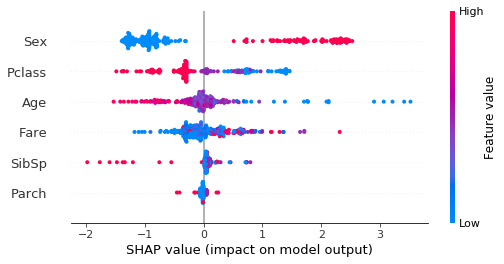

In [33]:
shap.summary_plot(shap_values, X_test)

From the above summary plot we are able to pick:
- Parch feature has been ignored by our Gradient Boosting Classifier model
- Passenger's 'Sex' caused to have higher predictions
- Number of siblings/spouses i.e. 'SibSp' caused for lower prediction values

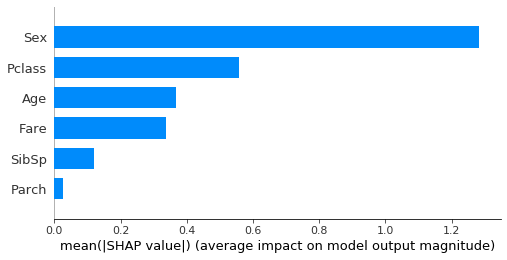

In [34]:
# another variant for summary plot using bar plot style
shap.summary_plot(shap_values, X_test, plot_type='bar')